## Get option prices through Interactive Brokers' Python api

In [1]:
using PyCall

Add current directory to the path

In [ ]:
pushfirst!(PyVector(pyimport("sys")["path"]), "");

In [3]:
ibpy_caller = pyimport("google_options")  

PyObject <module 'goog' from '/home/dpk1729/goog.py'>

Run main function from python script

In [ ]:
option_prices = ibpy_caller.main()  

In [32]:
option_prices = Dict(900.0 => 531.8, 950.0 => 481.8, 1000.0 => 431.8, 1050.0 => 381.8, 1100.0 => 331.8)

Dict{Float64,Float64} with 5 entries:
  1100.0 => 331.8
  900.0  => 531.8
  1050.0 => 381.8
  950.0  => 481.8
  1000.0 => 431.8

## Calculate implied volatility with Miletus

In [31]:
using Miletus
using Dates

In [41]:
strikes = sort!(collect(keys(option_prices)))

5-element Array{Float64,1}:
  900.0
  950.0
 1000.0
 1050.0
 1100.0

In [34]:
contracts = [EuropeanCall(Date("2020-06-05"), SingleStock(), K) for K in strikes]

5-element Array{Miletus.When{Miletus.LiftObs{typeof(==),Tuple{Miletus.DateObs,Miletus.ConstObs{Date}},Bool},Miletus.Either{Miletus.Both{SingleStock,Miletus.Give{Miletus.Amount{Miletus.ConstObs{Float64}}}},Miletus.Zero}},1}:
 When
 ├─{==}
 │  ├─DateObs
 │  └─2020-06-05
 └─Either
    ├─Both
    │  ├─SingleStock
    │  └─Give
    │     └─Amount
    │        └─1100.0
    └─Zero

 When
 ├─{==}
 │  ├─DateObs
 │  └─2020-06-05
 └─Either
    ├─Both
    │  ├─SingleStock
    │  └─Give
    │     └─Amount
    │        └─900.0
    └─Zero

 When
 ├─{==}
 │  ├─DateObs
 │  └─2020-06-05
 └─Either
    ├─Both
    │  ├─SingleStock
    │  └─Give
    │     └─Amount
    │        └─1050.0
    └─Zero

 When
 ├─{==}
 │  ├─DateObs
 │  └─2020-06-05
 └─Either
    ├─Both
    │  ├─SingleStock
    │  └─Give
    │     └─Amount
    │        └─950.0
    └─Zero

 When
 ├─{==}
 │  ├─DateObs
 │  └─2020-06-05
 └─Either
    ├─Both
    │  ├─SingleStock
    │  └─Give
    │     └─Amount
    │        └─1000.0
    └─Zero


In [42]:
prices = sort!(collect(values(option_prices)))

5-element Array{Float64,1}:
 331.8
 381.8
 431.8
 481.8
 531.8

In [56]:
core = CoreModel(Date("2020-06-01"), 531.9, 0.0014, 0.0)

Core Model
----------
S₀ = 531.9
T = 2020-06-01
Yield Constant Continuous Curve with r = 0.0014, T = 2020-06-01 
Carry Constant Continuous Curve with r = 0.0, T = 2020-06-01 


In [57]:
ivols = ivol.([core], contracts, prices)

5-element Array{Float64,1}:
 21.09170564649997
 23.437180220219975
 28.464469730104593
 34.477229217933754
 72.83877690994488

In [ ]:
using Plots

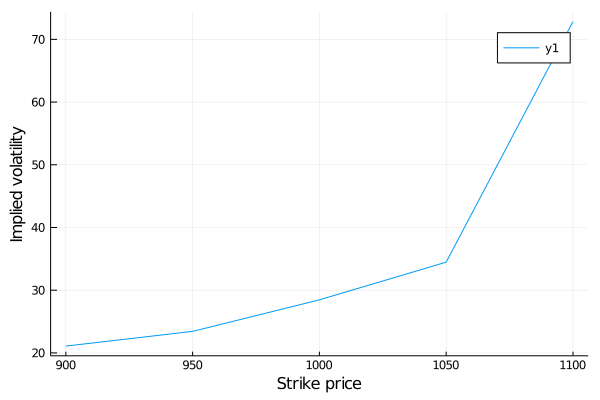

In [66]:
plot(strikes,ivols, xlabel = "Strike price", ylabel="Implied volatility")